In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import os
import glob
# path of the data
path = r'C:/Users/pmbw/Development/datasets/velocities_current600' 
#Smoothing function
from scipy.ndimage.filters import gaussian_filter1d

In [2]:
#!pip install chart_studio

In [3]:
#import chart_studio.plotly as py


# Import Data

## Velocities average for DNS datasets

In [4]:
#Velocities average for DNS datasets
all_velocities =  glob.glob(path + "/vel*.dat")
#os.path.join(path, "*.csv")
velocity_lists = []
#iterate through velocities and collate as one file
for velocities in all_velocities:
    velocities_df = pd.read_csv(velocities, index_col=None, header=None,delim_whitespace=True)
    velocity_lists.append(velocities_df)
#concatenate and average for each points ie distance from the wall    
df_avg = pd.concat([each.stack() for each in velocity_lists],axis=1)\
             .apply(lambda x:x.mean(),axis=1)\
             .unstack()
#name the columns as follow
df_avg.columns = ['distance_from_wall', 'x_velocity','y_velocity','z_velocity']
#Normalise data and add additional variables 
df_avg['dist_norm'] = ((0.4992-df_avg.distance_from_wall))*2 
#df_avg.to_csv('./datasets/velocities/hendek.csv')

# RMS datasets

In [5]:
all_rms =  glob.glob(path + "/rms*.dat")
rms_lists = []
#iterate through velocities and collate as one file
for rms in all_rms:
    rms_df = pd.read_csv(rms, index_col=None, header=None,delim_whitespace=True)
    rms_lists.append(rms_df)
#concatenate and average for each points ie distance from the wall    
dfrms_avg = pd.concat([each.stack() for each in rms_lists],axis=1)\
             .apply(lambda x:x.mean(),axis=1)\
             .unstack()
#name the columns as follow
dfrms_avg.columns = ['distance_from_wall', 'x_velocity','y_velocity','z_velocity','shear_stress']
#Normalise data and add additional variables 
dfrms_avg['dist_norm'] = ((0.4992-dfrms_avg.distance_from_wall))*2 
#dfrms_avg['uzur'] = dfrms_avg.men**2


In [6]:
df_avg.tail(100)

,distance_from_wall,x_velocity,y_velocity,z_velocity,dist_norm
246,0.37250,9.186396e-04,-0.000111,1.031374,0.2534
247,0.37375,-3.211486e-04,-0.000240,1.024888,0.2509
248,0.37500,-2.872881e-04,-0.000100,1.024334,0.2484
249,0.37625,-2.141287e-04,-0.000040,1.022114,0.2459
250,0.37750,-1.053386e-03,-0.000042,1.017745,0.2434
...,...,...,...,...,...
341,0.49375,-1.681074e-05,0.000160,0.223118,0.0109
342,0.49500,1.541977e-05,-0.000324,0.204655,0.0084
343,0.49750,4.925469e-07,-0.000039,0.067596,0.0034
344,0.49875,0.000000e+00,0.000000,0.000000,0.0009


In [7]:
dfrms_avg.head()

,distance_from_wall,x_velocity,y_velocity,z_velocity,shear_stress,dist_norm
0,0.00000,0.041569,0.043261,0.049835,0.000077,0.9984
1,0.00375,0.042475,0.042479,0.049859,0.000045,0.9909
2,0.00500,0.042461,0.042465,0.049881,0.000063,0.9884
3,0.01250,0.042497,0.042530,0.050017,0.000099,0.9734
4,0.01750,0.042543,0.042541,0.050174,0.000133,0.9634


# Previous DNS datasets

In [8]:
df = pd.read_csv('C://Leeds/Datasets_El_Khoury/Re361/360_Re_1.dat',
          skiprows=24, header=None, sep='\s\s+', engine='python') 
df.columns = ['OneMin_r', 'OneMin_rPlus1','UzPlus1','UzByUb1', 'Ur_rmsPlus1','Ut_rmsPlus1','Uz_rmsPlus1', 'UzUrPlus1','dUzdrPlus1']
df['OneMin_rPlus'] =df.OneMin_rPlus1/3.6121788913802544E+02
df['UzPlus'] = df.UzPlus1*6.1746647715901784E-02
df['Uz_rmsPlus'] = df.Uz_rmsPlus1*6.1746647715901784E-02

df['Ur_rmsPlus'] = df.Ur_rmsPlus1*6.1746647715901784E-02
df['Ut_rmsPlus'] = df.Ut_rmsPlus1*6.1746647715901784E-02
#Waring invalid value for last row - it's small number when square root taken it invokes runtime error
df['UzUrPlus'] = np.sqrt(df.UzUrPlus1)*6.1746647715901784E-02

C:\Users\pmbw\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Mean axial velocity $U_z^+$

In [9]:
# ax = sns.lineplot(x="yp", y="u", data=df_avg)
# #ax = sns.lineplot(x="OneMin_rPlus", y="UzPlus", data=df)
# ax.set_xscale('log')
#plt.plot(df.OneMin_rPlus,df.UzPlus, color ='blue')

In [10]:
# character description

# '-'       solid line style # '--'      dashed line style # '-.'      dash-dot line style
# ':'       dotted line style # '.'       point marker # ','       pixel marker
# 'o'       circle marker # 'v'       triangle_down marker # '^'       triangle_up marker
# '<'       triangle_left marker # '>'       triangle_right marker # '1'       tri_down marker
# '2'       tri_up marker # '3'       tri_left marker # '4'       tri_right marker
# 's'       square marker # 'p'       pentagon marker # '*'       star marker
# 'h'       hexagon1 marker # 'H'       hexagon2 marker # '+'       plus marker
# 'x'       x marker # 'D'       diamond marker # 'd'       thin_diamond marker
# '|'       vline marker # '_'       hline marker

In [11]:
# dd = pd.read_csv(r'C:/Users/pmbw/Development/datasets/Dataset 0.csv',
#            header=None, engine='python') 

# dd.columns = ['OneMin_rPlus', 'UzPlus']

In [12]:
df.columns

Index(['OneMin_r', 'OneMin_rPlus1', 'UzPlus1', 'UzByUb1', 'Ur_rmsPlus1',
       'Ut_rmsPlus1', 'Uz_rmsPlus1', 'UzUrPlus1', 'dUzdrPlus1', 'OneMin_rPlus',
       'UzPlus', 'Uz_rmsPlus', 'Ur_rmsPlus', 'Ut_rmsPlus', 'UzUrPlus'],
      dtype='object')

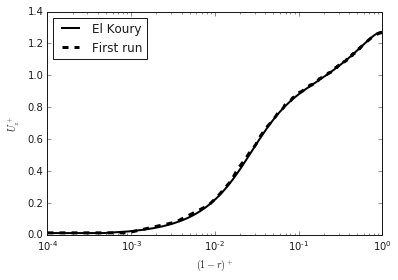

In [15]:
ax = plt.gca()
# Set x logaritmic
ax.set_xscale('log')
#plt.xlim(0.001,1.1)
z_velocity_smoothed = gaussian_filter1d(df_avg.z_velocity, sigma=0.6)
plt.plot(df.OneMin_rPlus,df.UzPlus, color ='black', linewidth=2, markersize=12)
plt.plot(df_avg.dist_norm,z_velocity_smoothed,'--',color ='black', linewidth=3, markersize=12)
plt.ylabel('$U_z^+$')
plt.xlabel('$(1-r)^+$')
plt.legend(['El Koury','First run'], loc='upper left');

In [57]:
import plotly as py
import plotly.graph_objs as go 
import ipywidgets as wingets
from scipy import special

#plt.plot(df.OneMin_rPlus,df.UzPlus, color ='black', linewidth=2, markersize=12)
#plt.plot(df_avg.dist_norm,z_velocity_smoothed,'--',color ='black', linewidth=3, markersize=12)


py.offline.init_notebook_mode(connected=True)
x= df_avg.dist_norm
z=df_avg.z_velocity

#y= df_avg.dist_norm # z = r*cos(t)
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=z, name='lines', line = dict(color='royalblue', width=4, dash='dash')))
fig.add_trace(go.Scatter(x=df.OneMin_rPlus, y=df.UzPlus,mode='lines', name='lines'))
fig.show()

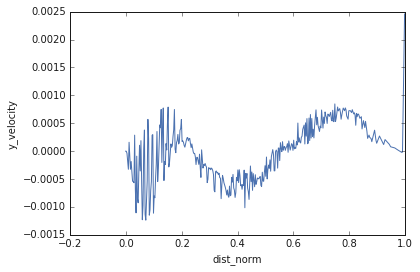

In [16]:
 ax = sns.lineplot(x="dist_norm", y="y_velocity",
                 err_style="bars", ci=68, data=df_avg)
#plt.plot(df_avg.dist_norm,z_velocity_smoothed,'--',color ='black', linewidth=3, markersize=12)

In [17]:
df_avg.head()

,distance_from_wall,x_velocity,y_velocity,z_velocity,dist_norm
0,0.00000,0.001424,0.002459,1.266951,0.9984
1,0.00375,0.000076,-0.000015,1.266912,0.9909
2,0.00500,0.000109,-0.000022,1.266875,0.9884
3,0.01250,0.000081,0.000024,1.266583,0.9734
4,0.01750,0.000114,0.000058,1.266259,0.9634


In [18]:
df_avg.loc[(df_avg.dist_norm < 1) , 'norm'] = 1
df_avg.loc[(df_avg.dist_norm < 0.975),'norm'] = 0.975
df_avg.loc[(df_avg.dist_norm < 0.95) , 'norm'] = 0.95
df_avg.loc[(df_avg.dist_norm < 0.925), 'norm'] = 0.925
df_avg.loc[(df_avg.dist_norm < 0.9) , 'norm'] = 0.9
df_avg.loc[(df_avg.dist_norm < 0.875),'norm'] = 0.875
df_avg.loc[(df_avg.dist_norm < 0.85), 'norm'] = 0.85
df_avg.loc[(df_avg.dist_norm < 0.825) , 'norm'] = 0.825
df_avg.loc[(df_avg.dist_norm < 0.8) , 'norm'] = 0.8
df_avg.loc[(df_avg.dist_norm < 0.775) , 'norm'] = 0.775
df_avg.loc[(df_avg.dist_norm < 0.75) , 'norm'] = 0.75
df_avg.loc[(df_avg.dist_norm < 0.725) , 'norm'] = 0.725
df_avg.loc[(df_avg.dist_norm < 0.7) , 'norm'] = 0.7
df_avg.loc[(df_avg.dist_norm < 0.675) , 'norm'] = 0.675
df_avg.loc[(df_avg.dist_norm < 0.65) , 'norm'] = 0.65
df_avg.loc[(df_avg.dist_norm < 0.625) , 'norm'] = 0.625
df_avg.loc[(df_avg.dist_norm < 0.6) , 'norm'] = 0.6
df_avg.loc[(df_avg.dist_norm < 0.575) , 'norm'] = 0.575
df_avg.loc[(df_avg.dist_norm < 0.55) , 'norm'] = 0.55
df_avg.loc[(df_avg.dist_norm < 0.525) , 'norm'] = 0.525
df_avg.loc[(df_avg.dist_norm < 0.5) , 'norm'] = 0.5
df_avg.loc[(df_avg.dist_norm < 0.475) , 'norm'] = 0.475
df_avg.loc[(df_avg.dist_norm < 0.45) , 'norm'] = 0.45
df_avg.loc[(df_avg.dist_norm < 0.425) , 'norm'] = 0.425
df_avg.loc[(df_avg.dist_norm < 0.4) , 'norm'] = 0.4
df_avg.loc[(df_avg.dist_norm < 0.375) , 'norm'] = 0.375
df_avg.loc[(df_avg.dist_norm < 0.35) , 'norm'] = 0.35
df_avg.loc[(df_avg.dist_norm < 0.325) , 'norm'] = 0.325
df_avg.loc[(df_avg.dist_norm < 0.3) , 'norm'] = 0.3
df_avg.loc[(df_avg.dist_norm < 0.275) , 'norm'] = 0.275
df_avg.loc[(df_avg.dist_norm < 0.25) , 'norm'] = 0.25
df_avg.loc[(df_avg.dist_norm < 0.225) , 'norm'] = 0.225
df_avg.loc[(df_avg.dist_norm < 0.2) , 'norm'] = 0.2
df_avg.loc[(df_avg.dist_norm < 0.15) , 'norm'] = 0.175
df_avg.loc[(df_avg.dist_norm < 0.15) , 'norm'] = 0.15
df_avg.loc[(df_avg.dist_norm < 0.1275) , 'norm'] = 0.125
df_avg.loc[(df_avg.dist_norm < 0.1) , 'norm'] = 0.1



# df_avg.loc[(df_avg.dist_norm < 1) , 'norm'] = 1

# df_avg.loc[(df_avg.dist_norm < 0.95) , 'norm'] = 0.95
# df_avg.loc[(df_avg.dist_norm < 0.9) , 'norm'] = 0.9
# df_avg.loc[(df_avg.dist_norm < 0.85) , 'norm'] = 0.85
# df_avg.loc[(df_avg.dist_norm < 0.8) , 'norm'] = 0.8
# df_avg.loc[(df_avg.dist_norm < 0.75) , 'norm'] = 0.75
# df_avg.loc[(df_avg.dist_norm < 0.7) , 'norm'] = 0.7
# df_avg.loc[(df_avg.dist_norm < 0.65) , 'norm'] = 0.65
# df_avg.loc[(df_avg.dist_norm < 0.6) , 'norm'] = 0.6
# df_avg.loc[(df_avg.dist_norm < 0.55) , 'norm'] = 0.55
# df_avg.loc[(df_avg.dist_norm < 0.5) , 'norm'] = 0.5
# df_avg.loc[(df_avg.dist_norm < 0.45) , 'norm'] = 0.45
# df_avg.loc[(df_avg.dist_norm < 0.4) , 'norm'] = 0.4
# df_avg.loc[(df_avg.dist_norm < 0.35) , 'norm'] = 0.35
# df_avg.loc[(df_avg.dist_norm < 0.3) , 'norm'] = 0.3
# df_avg.loc[(df_avg.dist_norm < 0.25) , 'norm'] = 0.25
# df_avg.loc[(df_avg.dist_norm < 0.2) , 'norm'] = 0.2
# df_avg.loc[(df_avg.dist_norm < 0.15) , 'norm'] = 0.15
# df_avg.loc[(df_avg.dist_norm < 0.1) , 'norm'] = 0.1






# df_avg.loc[(df_avg.dist_norm < 1) , 'norm'] = 10
# df_avg.loc[(df_avg.dist_norm < 0.9) , 'norm'] = 9
# df_avg.loc[(df_avg.dist_norm < 0.8) , 'norm'] = 8
# df_avg.loc[(df_avg.dist_norm < 0.7) , 'norm'] = 7
# df_avg.loc[(df_avg.dist_norm < 0.6) , 'norm'] = 6
# df_avg.loc[(df_avg.dist_norm < 0.5) , 'norm'] = 5
# df_avg.loc[(df_avg.dist_norm < 0.4) , 'norm'] = 4
# df_avg.loc[(df_avg.dist_norm < 0.3) , 'norm'] = 3
# df_avg.loc[(df_avg.dist_norm < 0.2) , 'norm'] = 2
# df_avg.loc[(df_avg.dist_norm < 0.1) , 'norm'] = 1


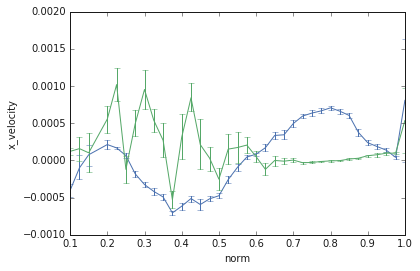

In [19]:
#ax = sns.lineplot(x="norm", y="z_velocity", err_style="bars", ci=68, data=df_avg)
ax = sns.lineplot(x="norm", y="y_velocity", err_style="bars", ci=68, data=df_avg)
ax = sns.lineplot(x="norm", y="x_velocity", err_style="bars", ci=68, data=df_avg)


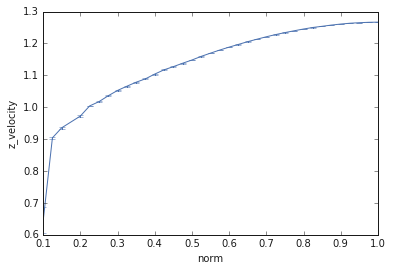

In [20]:
ax = sns.lineplot(x="norm", y="z_velocity", err_style="bars", ci=68, data=df_avg)

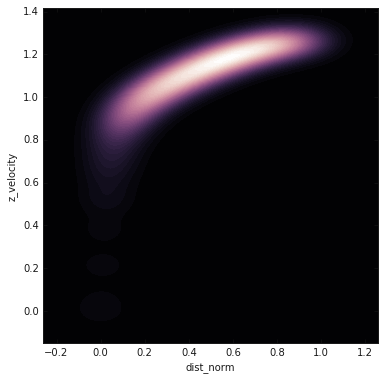

In [21]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df_avg.dist_norm, df_avg.z_velocity, cmap=cmap, n_levels=60, shade=True);

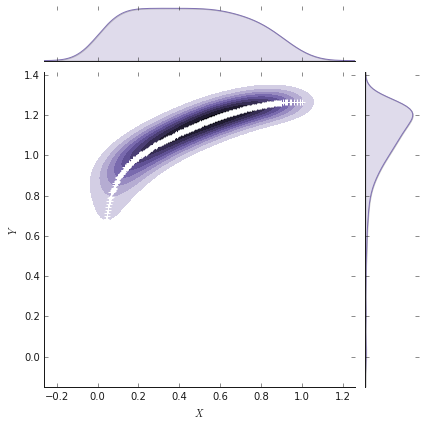

In [22]:
g = sns.jointplot(x="dist_norm", y="z_velocity", data=df_avg, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

# RMS


In [23]:
# dfrms_avg.columns = ['point', 'x','y','z','men']

In [24]:

# dfrms_avg['uxrms'] = dfrms_avg.x *(1/6.1746647715901784E-02)
# dfrms_avg['uyrms'] = dfrms_avg.y *(1/6.1746647715901784E-02)
#df_avg_rms['umenrms'] = df_avg_rms.men *(5850/361)



In [25]:
# dfrms_avg['yrms'] = ((0.4992-dfrms_avg.point)*3.6121788913802544E+02)*2
# dfrms_avg['uzrms'] = (dfrms_avg.z)*(1/6.1746647715901784E-02)

#((0.4992-df_avg.point)*3.6121788913802544E+02)*2

In [26]:
df.columns

Index(['OneMin_r', 'OneMin_rPlus1', 'UzPlus1', 'UzByUb1', 'Ur_rmsPlus1',
       'Ut_rmsPlus1', 'Uz_rmsPlus1', 'UzUrPlus1', 'dUzdrPlus1', 'OneMin_rPlus',
       'UzPlus', 'Uz_rmsPlus', 'Ur_rmsPlus', 'Ut_rmsPlus', 'UzUrPlus'],
      dtype='object')

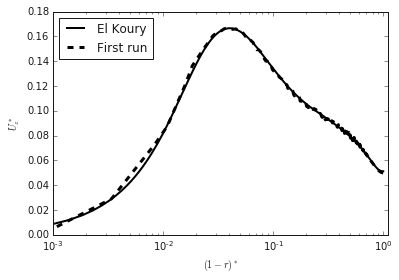

In [27]:
ax = plt.gca()
# Set x logaritmic
ax.set_xscale('log')
plt.xlim(0.001,1.1)
#plt.ylim(0.0,0.09)
z_rms_smoothed = gaussian_filter1d(dfrms_avg.z_velocity, sigma=0.5)
plt.plot(df.OneMin_rPlus,df.Uz_rmsPlus, color ='black', linewidth=2, markersize=12)
plt.plot(dfrms_avg.dist_norm,z_rms_smoothed,'--',color ='black', linewidth=3, markersize=12)
plt.ylabel('$U_z^*$')
plt.xlabel('$(1-r)^*$')
plt.legend(['El Koury','First run'],loc='upper left');

In [28]:
dfrms_avg.columns

Index(['distance_from_wall', 'x_velocity', 'y_velocity', 'z_velocity',
       'shear_stress', 'dist_norm'],
      dtype='object')

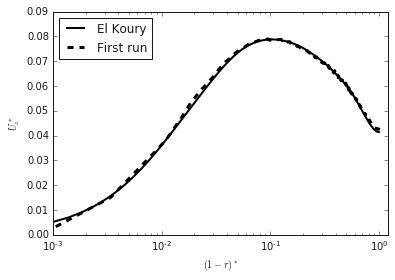

In [29]:
ax = plt.gca()
# Set x logaritmic
ax.set_xscale('log')
plt.xlim(0.001,1.2)
plt.ylim(0.0,0.09)
y_rms_smoothed = gaussian_filter1d(dfrms_avg.y_velocity, sigma=0.5)
plt.plot(df.OneMin_rPlus,df.Ut_rmsPlus, color ='black', linewidth=2, markersize=12)
plt.plot(dfrms_avg.dist_norm,y_rms_smoothed,'--',color ='black', linewidth=3, markersize=12)

plt.ylabel('$U_z^*$')
plt.xlabel('$(1-r)^*$')
plt.legend(['El Koury','First run'], loc='upper left');

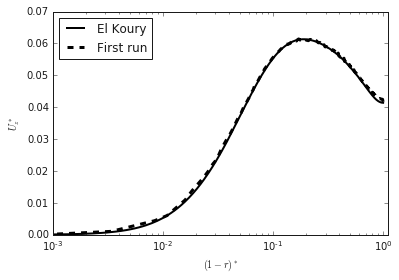

In [30]:
ax = plt.gca()
# Set x logaritmic
ax.set_xscale('log')
plt.xlim(0.001,1.1)
x_rms_smoothed = gaussian_filter1d(dfrms_avg.x_velocity, sigma=0.5)
plt.plot(df.OneMin_rPlus,df.Ur_rmsPlus, color ='black', linewidth=2, markersize=12)
plt.plot(dfrms_avg.dist_norm,x_rms_smoothed,'--',color ='black', linewidth=3, markersize=12)
plt.ylabel('$U_z^*$')
plt.xlabel('$(1-r)^*$')
plt.legend(['El Koury','First run'], loc='upper left');

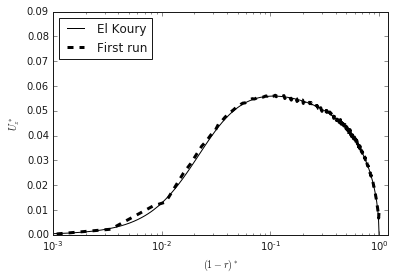

In [31]:
ax = plt.gca()
# Set x logaritmic
ax.set_xscale('log')
plt.xlim(0.001,1.2)
plt.ylim(0.0,0.09)
#shear_stress_rms_smoothed = gaussian_filter1d(np.sqrt(dfrms_avg.shear_stress), sigma=0.5)
plt.plot(df.OneMin_rPlus,df.UzUrPlus, color ='black', linewidth=1)
plt.plot(dfrms_avg.dist_norm,np.sqrt(dfrms_avg.shear_stress),'--',color ='black', linewidth=3)
plt.ylabel('$U_z^*$')
plt.xlabel('$(1-r)^*$')
plt.legend(['El Koury','First run'], loc='upper left');

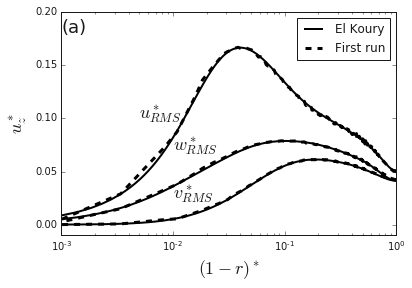

In [32]:
ax = plt.gca()
# Set x logaritmic
ax.set_xscale('log')
plt.xlim(0.001,1)
plt.ylim(-0.01,0.2)
plt.plot(df.OneMin_rPlus,df.Ut_rmsPlus, color ='black', linewidth=2, markersize=12)
plt.plot(dfrms_avg.dist_norm,y_rms_smoothed,'--',color ='black', linewidth=3, markersize=12)

plt.plot(df.OneMin_rPlus,df.Ur_rmsPlus, color ='black', linewidth=2, markersize=12)
plt.plot(dfrms_avg.dist_norm,dfrms_avg.x_velocity,'--',color ='black', linewidth=3, markersize=12)

plt.plot(df.OneMin_rPlus,df.Uz_rmsPlus, color ='black', linewidth=2, markersize=12)
plt.plot(dfrms_avg.dist_norm,z_rms_smoothed,'--',color ='black', linewidth=3, markersize=12)
plt.text(0.005,0.1, '$u_{RMS}^*$',fontsize=18)
plt.text(0.01,0.07,'$w_{RMS}^*$',fontsize=18)
plt.text(0.01,0.025,'$v_{RMS}^*$',fontsize=18)
plt.text(0.001,0.18,'(a)',fontsize=18)
plt.ylabel('$u_z^*$',fontsize=18)
plt.xlabel('$(1-r)^*$',fontsize=18)
plt.legend(['El Koury','First run'], loc='upper right');

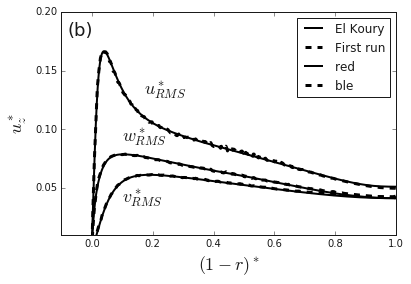

In [33]:
ax = plt.gca()
# Set x logaritmic
#ax.set_xscale('log')
plt.xlim(-0.1,1)
plt.ylim(0.01,0.2)
plt.plot(df.OneMin_rPlus,df.Ut_rmsPlus, color ='black', linewidth=2, markersize=12)
plt.plot(dfrms_avg.dist_norm,y_rms_smoothed,'--',color ='black', linewidth=3, markersize=12)
plt.plot(df.OneMin_rPlus,df.Ur_rmsPlus, color ='black', linewidth=2, markersize=12)
plt.plot(dfrms_avg.dist_norm,dfrms_avg.x_velocity,'--',color ='black', linewidth=3, markersize=12)
plt.plot(df.OneMin_rPlus,df.Uz_rmsPlus, color ='black', linewidth=2, markersize=12)
plt.plot(dfrms_avg.dist_norm,z_rms_smoothed,'--',color ='black', linewidth=3, markersize=12)
plt.text(0.17,0.13, '$u_{RMS}^*$',fontsize=18)
plt.text(0.1,0.09,'$w_{RMS}^*$',fontsize=18)
plt.text(0.1,0.038,'$v_{RMS}^*$',fontsize=18)
plt.text(-0.08,0.18,'(b)',fontsize=18)
plt.ylabel('$u_z^*$',fontsize=18)
plt.xlabel('$(1-r)^*$',fontsize=18)

plt.legend(['El Koury','First run', 'red ', 'ble '], loc='upper right');

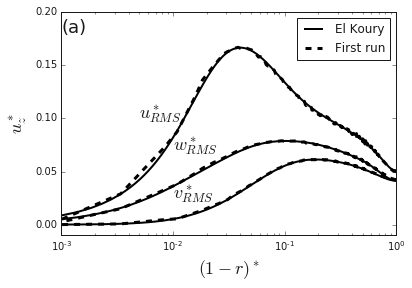

In [34]:
ax = plt.gca()
# Set x logaritmic
ax.set_xscale('log')
plt.xlim(0.001,1)
plt.ylim(-0.01,0.2)
plt.plot(df.OneMin_rPlus,df.Ut_rmsPlus, color ='black', linewidth=2, markersize=12)
plt.plot(dfrms_avg.dist_norm,y_rms_smoothed,'--',color ='black', linewidth=3, markersize=12)

plt.plot(df.OneMin_rPlus,df.Ur_rmsPlus, color ='black', linewidth=2, markersize=12)
plt.plot(dfrms_avg.dist_norm,dfrms_avg.x_velocity,'--',color ='black', linewidth=3, markersize=12)

plt.plot(df.OneMin_rPlus,df.Uz_rmsPlus, color ='black', linewidth=2, markersize=12)
plt.plot(dfrms_avg.dist_norm,z_rms_smoothed,'--',color ='black', linewidth=3, markersize=12)
plt.text(0.005,0.1, '$u_{RMS}^*$',fontsize=18)
plt.text(0.01,0.07,'$w_{RMS}^*$',fontsize=18)
plt.text(0.01,0.025,'$v_{RMS}^*$',fontsize=18)
plt.text(0.001,0.18,'(a)',fontsize=18)
plt.ylabel('$u_z^*$',fontsize=18)
plt.xlabel('$(1-r)^*$',fontsize=18)
plt.legend(['El Koury','First run'], loc='upper right');

In [36]:
# x = df.OneMin_rPlus,
# y = df.Uz_rmsPlus
# data = [dict(
#         visible = False,
#         line=dict(color='#00CED1', width=6),
#         name = '𝜈 = '+str(step),
#         x = x,
#         y = y)]
# #data[10]['visible'] = True

# steps = []
# for i in range(len(data)):
#     step = dict(
#         method = 'restyle',
#         args = ['visible', [False] * len(data)],
#     )
#     step['args'][1][i] = True # Toggle i'th trace to "visible"
#     steps.append(step)

# sliders = [dict(
#     active = 10,
#     currentvalue = {"prefix": "Frequency: "},
#     pad = {"t": 50},
#     steps = steps
# )]

# layout = dict(sliders=sliders)
# fig = dict(data=data, layout=layout)
# py.offline.iplot(fig)

# #py.iplot(fig, filename='Sine Wave Slider')

# Experimenting 

## Linear regression with marginal distributions

In [37]:
#sns.set(style="darkgrid")

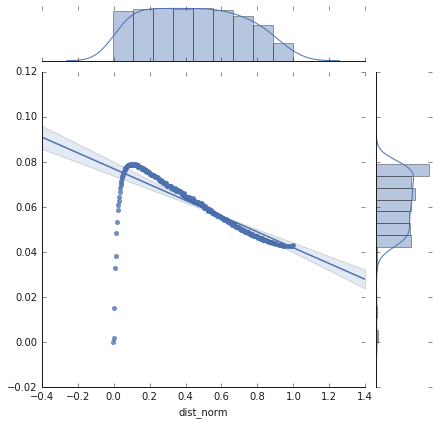

In [38]:
g = sns.jointplot(dfrms_avg.dist_norm,y_rms_smoothed, data=dfrms_avg, kind="reg")

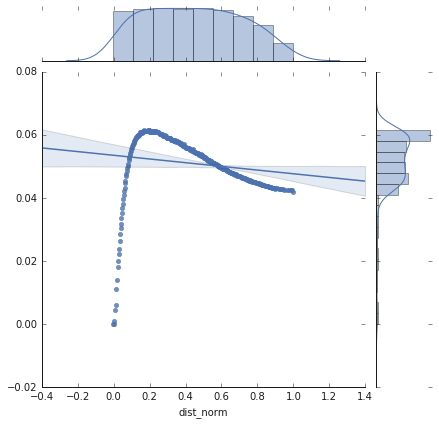

In [39]:
g = sns.jointplot(dfrms_avg.dist_norm,x_rms_smoothed, data=dfrms_avg, kind="reg")

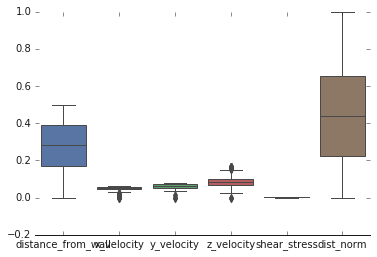

In [40]:
sns.boxplot(data=dfrms_avg, palette="deep")
sns.despine(left=True)

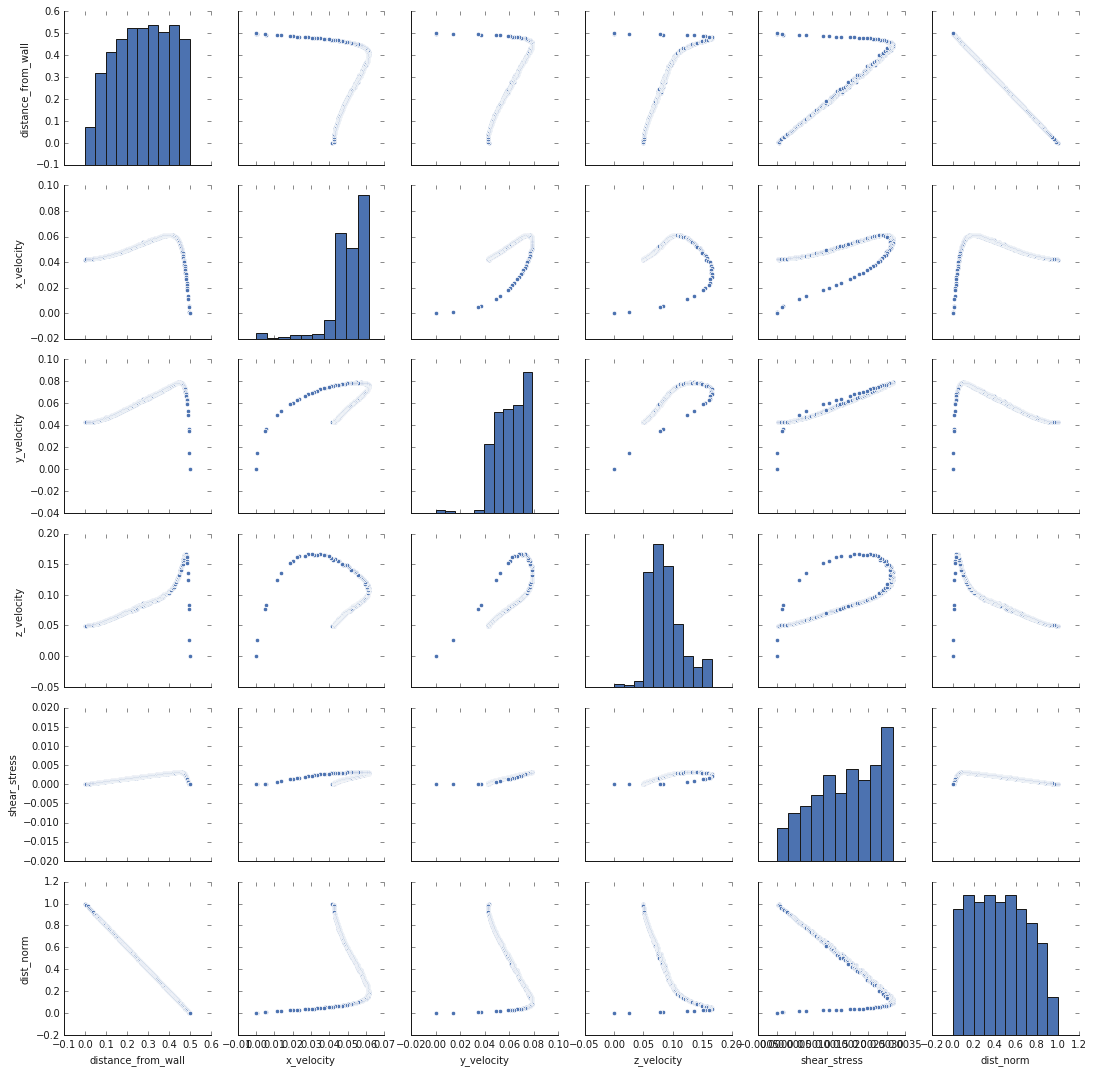

In [41]:
sns.pairplot(dfrms_avg)

In [42]:
dfrms_avg.columns

Index(['distance_from_wall', 'x_velocity', 'y_velocity', 'z_velocity',
       'shear_stress', 'dist_norm'],
      dtype='object')

In [43]:
# dfrms_avg['column2'] = np.where((dfrms_avg['dist_norm'] > 0.1)
#                            & (dfrms_avg['dist_norm'] < 0.2]) ==2)) 


In [44]:
#xxx = dfrms_avg.dist_norm

In [45]:
dfrms_avg.loc[(dfrms_avg.dist_norm < 1) , 'norm'] = 10
dfrms_avg.loc[(dfrms_avg.dist_norm < 0.9) , 'norm'] = 9
dfrms_avg.loc[(dfrms_avg.dist_norm < 0.8) , 'norm'] = 8
dfrms_avg.loc[(dfrms_avg.dist_norm < 0.7) , 'norm'] = 7
dfrms_avg.loc[(dfrms_avg.dist_norm < 0.6) , 'norm'] = 6
dfrms_avg.loc[(dfrms_avg.dist_norm < 0.5) , 'norm'] = 5
dfrms_avg.loc[(dfrms_avg.dist_norm < 0.4) , 'norm'] = 4
dfrms_avg.loc[(dfrms_avg.dist_norm < 0.3) , 'norm'] = 3
dfrms_avg.loc[(dfrms_avg.dist_norm < 0.2) , 'norm'] = 2
dfrms_avg.loc[(dfrms_avg.dist_norm < 0.1) , 'norm'] = 1




#dfrms_avg.loc[dfrms_avg['dist_norm'] > 0.1 and dfrms_avg['dist_norm'] < 0.2, 'dist_norm'] = 2


In [46]:
dfrms_avg.head(100)

,distance_from_wall,x_velocity,y_velocity,z_velocity,shear_stress,dist_norm,norm
0,0.00000,0.041569,0.043261,0.049835,0.000077,0.9984,10.0
1,0.00375,0.042475,0.042479,0.049859,0.000045,0.9909,10.0
2,0.00500,0.042461,0.042465,0.049881,0.000063,0.9884,10.0
3,0.01250,0.042497,0.042530,0.050017,0.000099,0.9734,10.0
4,0.01750,0.042543,0.042541,0.050174,0.000133,0.9634,10.0
...,...,...,...,...,...,...,...
95,0.18375,0.048645,0.053613,0.070103,0.001352,0.6309,7.0
96,0.18500,0.048727,0.054047,0.071129,0.001406,0.6284,7.0
97,0.18625,0.048702,0.054121,0.071408,0.001415,0.6259,7.0
98,0.18750,0.048868,0.054437,0.071908,0.001449,0.6234,7.0


In [47]:
#sns.pairplot(dfrms_avg, hue="norm")

In [48]:
dfrms_avg.columns

Index(['distance_from_wall', 'x_velocity', 'y_velocity', 'z_velocity',
       'shear_stress', 'dist_norm', 'norm'],
      dtype='object')

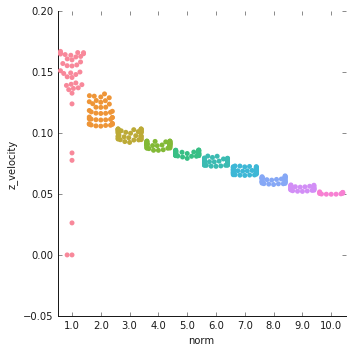

In [49]:
sns.catplot(x="norm", y="z_velocity", kind="swarm", data=dfrms_avg);

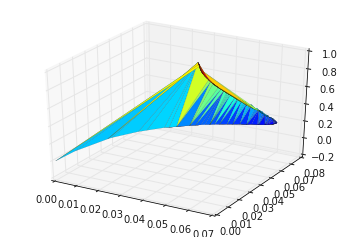

In [50]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(dfrms_avg.x_velocity, dfrms_avg.y_velocity, dfrms_avg.dist_norm, cmap=plt.cm.jet, linewidth=0.1)
#ax.contour3D(dfrms_avg.x_velocity, dfrms_avg.y_velocity, dfrms_avg.z_velocity, 50, cmap='binary')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z');




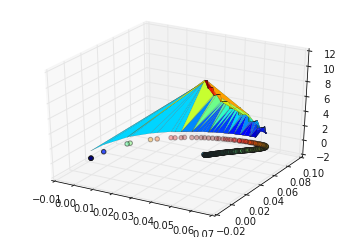

In [51]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(dfrms_avg.x_velocity, dfrms_avg.y_velocity, dfrms_avg.norm, cmap=plt.cm.jet, linewidth=0.1)
ax.scatter3D(dfrms_avg.x_velocity, dfrms_avg.y_velocity, dfrms_avg.z_velocity, c=dfrms_avg.z_velocity);

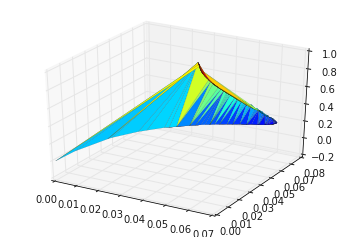

In [52]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(dfrms_avg.x_velocity, dfrms_avg.y_velocity, dfrms_avg.dist_norm, cmap=plt.cm.jet, linewidth=0.1)
#ax.scatter3D(dfrms_avg.x_velocity, dfrms_avg.y_velocity, dfrms_avg.z_velocity, c=dfrms_avg.z_velocity);

In [53]:
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
# from plotly.offline import plot as py
# import plotly.graph_objects as go



In [55]:
                # z = r*cos(t)

    

    
    import plotly as py
import plotly.graph_objs as go 
import ipywidgets as wingets
from scipy import special 
py.offline.init_notebook_mode(connected=True)
    x= df_avg.dist_norm
z=df_avg.z_velocity
#y= df_avg.dist_norm # z = r*cos(t)
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=z,mode='lines', name='lines'))
fig.show()
#data = [surface]

# layout = go.Layout(
#     title='Parametric Plot',
#     scene=dict(
#         xaxis=dict(
#             gridcolor='rgb(255, 255, 255)',
#             zerolinecolor='rgb(255, 255, 255)',
#             showbackground=True,
#             backgroundcolor='rgb(230, 230,230)'
#         ),
#         yaxis=dict(
#             gridcolor='rgb(255, 255, 255)',
#             zerolinecolor='rgb(255, 255, 255)',
#             showbackground=True,
#             backgroundcolor='rgb(230, 230,230)'
#         ),
#         zaxis=dict(
#             gridcolor='rgb(255, 255, 255)',
#             zerolinecolor='rgb(255, 255, 255)',
#             showbackground=True,
#             backgroundcolor='rgb(230, 230,230)'
#         )
#     )
# )

# fig = go.Figure(data=data, layout=layout)
# py.offline.iplot(fig)